In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score


# Load datasets
train_df = pd.read_csv('cleaned_train.csv')
test_df = pd.read_csv('cleaned_test.csv')




In [2]:
# Create a new target variable for the first model
train_df['STATUS_BINARY'] = train_df['STATUS'].apply(lambda x: 1 if x != 0 else 0)
test_df['STATUS_BINARY'] = test_df['STATUS'].apply(lambda x: 1 if x != 0 else 0)

In [3]:
X_train = train_df.drop(columns=['STATUS', 'STATUS_BINARY'])
y_train = train_df['STATUS_BINARY']
X_test = test_df.drop(columns=['STATUS', 'STATUS_BINARY'])
y_test = test_df['STATUS_BINARY']

Fitting Random Forest, LightGBM and XGBoost to check model performance with all features.

In [5]:
# Fit Random Forest model
rf_model = RandomForestClassifier(random_state=42)

rfcv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring = 'precision')

print("Cross-validation scores:", rfcv_scores)
print("Mean CV accuracy:", rfcv_scores.mean())

rf_model.fit(X_train, y_train)

# Predict on test set
y_test_pred_rf = rf_model.predict(X_test)

# Calculate precision
precision_rf = precision_score(y_test, y_test_pred_rf)
print(f'Random Forest Precision: {precision_rf}')


Cross-validation scores: [0.55687204 0.59027778 0.57931034 0.58222222 0.52777778]
Mean CV accuracy: 0.5672920321040111
Random Forest Precision: 0.6019417475728155


In [6]:
# Fit LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

lgbcv_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring = 'precision')

print("Cross-validation scores:", lgbcv_scores)
print("Mean CV accuracy:", lgbcv_scores.mean())

lgb_model.fit(X_train, y_train)

# Predict on test set
y_test_pred_lgb = lgb_model.predict(X_test)

# Calculate precision
precision_lgb = precision_score(y_test, y_test_pred_lgb)
print(f'LightGBM Precision: {precision_lgb}')


[LightGBM] [Info] Number of positive: 32671, number of negative: 179298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 211969, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.154131 -> initscore=-1.702561
[LightGBM] [Info] Start training from score -1.702561
[LightGBM] [Info] Number of positive: 32671, number of negative: 179298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2999
[LightGBM] [Info] Number of data points in the train set: 211969, number of used features: 51
[LightGBM] [In

In [7]:
# Fit XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgbcv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring = 'precision')

print("Cross-validation scores:", xgbcv_scores)
print("Mean CV accuracy:", xgbcv_scores.mean())

xgb_model.fit(X_train, y_train)

# Predict on test set
y_test_pred_xgb = xgb_model.predict(X_test)

# Calculate precision
precision_xgb = precision_score(y_test, y_test_pred_xgb)
print(f'XGBoost Precision: {precision_xgb}')


C:\Users\peter\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:40:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\peter\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:40:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\peter\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:40:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\peter\anaconda3\Lib\site-packages\

Cross-validation scores: [0.5027027  0.52941176 0.53333333 0.57289003 0.51612903]
Mean CV accuracy: 0.5308933717150861


C:\Users\peter\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:40:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Precision: 0.5777439024390244


In [8]:
# Predict on test set
y_test_pred_lgb = lgb_model.predict(X_test)

# Generate classification report
classification_report_lgb = classification_report(y_test, y_test_pred_lgb)
print('Classification Report for LightGBM Model:')
print(classification_report_lgb)


Classification Report for LightGBM Model:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     39339
           1       0.68      0.03      0.07      7420

    accuracy                           0.84     46759
   macro avg       0.76      0.52      0.49     46759
weighted avg       0.82      0.84      0.78     46759



Checking feature importance with LightGBM because it has the best performance.

CODE FOR THE TRAIN AND TEST SET ON THE FULL MODEL

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import precision_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

# Perform cross-validation and store results
cv_scores = {}
test_precisions = {}

for model_name, model in models.items():
    cv_scores[model_name] = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    test_precisions[model_name] = precision_score(y_test, y_test_pred)

# Calculate mean cross-validation precisions
mean_cv_precisions = {model_name: scores.mean() for model_name, scores in cv_scores.items()}




[LightGBM] [Info] Number of positive: 32671, number of negative: 179298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 211969, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.154131 -> initscore=-1.702561
[LightGBM] [Info] Start training from score -1.702561
[LightGBM] [Info] Number of positive: 32671, number of negative: 179298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2999
[LightGBM] [Info] Number of data points in the train set: 211969, number of used features: 51
[LightGBM] [In

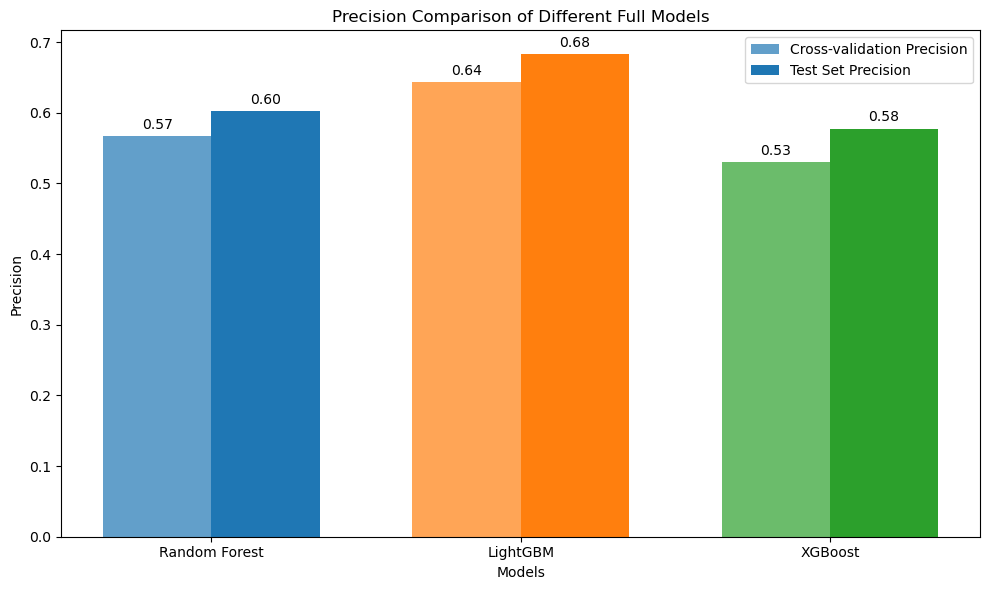

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Example data (replace these with your actual data)
labels = list(models.keys())
cv_precisions = [mean_cv_precisions[model_name] for model_name in labels]
test_precisions_values = [test_precisions[model_name] for model_name in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Define a colormap
cmap = plt.get_cmap('tab10')  # Using the 'tab10' colormap which has 10 distinct colors

# Plot bars with different colors for each model and different tones for CV and Test
bars1 = []
bars2 = []

for i in range(len(labels)):
    color = cmap(i)  # Get the color for this model
    cv_color = mcolors.to_rgba(color, alpha=0.7)  # Slightly transparent
    test_color = mcolors.to_rgba(color, alpha=1.0)  # Opaque

    bar1 = ax.bar(x[i] - width/2, cv_precisions[i], width, label='Cross-validation Precision' if i == 0 else "", color=cv_color)
    bar2 = ax.bar(x[i] + width/2, test_precisions_values[i], width, label='Test Set Precision' if i == 0 else "", color=test_color)
    
    bars1.append(bar1)
    bars2.append(bar2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Precision')
ax.set_title('Precision Comparison of Different Full Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for bar in bars1:
    autolabel(bar)
for bar in bars2:
    autolabel(bar)

fig.tight_layout()
plt.show()

Top 15 Features:
                       Feature  Importance
5            GARAGE_LOC_ZIP_CD         288
4                   STATE_ABBR         206
47               AVG_TERM_PREM         203
18            NEW_VEH_MODEL_YR         199
48  POL_ANNL_TTL_BILL_PREM_AMT         140
30            POL_MIN_DRVR_AGE         129
1                   POL_EFF_DT         129
29            POL_MAX_DRVR_AGE         127
45        MAX_COMP_RTNG_SYM_CD         116
41         AVG_VEHICLE_MILEAGE         105
32             ADV_QTE_DAY_CNT          97
44          MAX_BI_RTNG_SYM_CD          89
2                   POL_EXP_DT          75
37            MKT_INDX_CTGY_CD          72
40                 INSURED_AGE          66


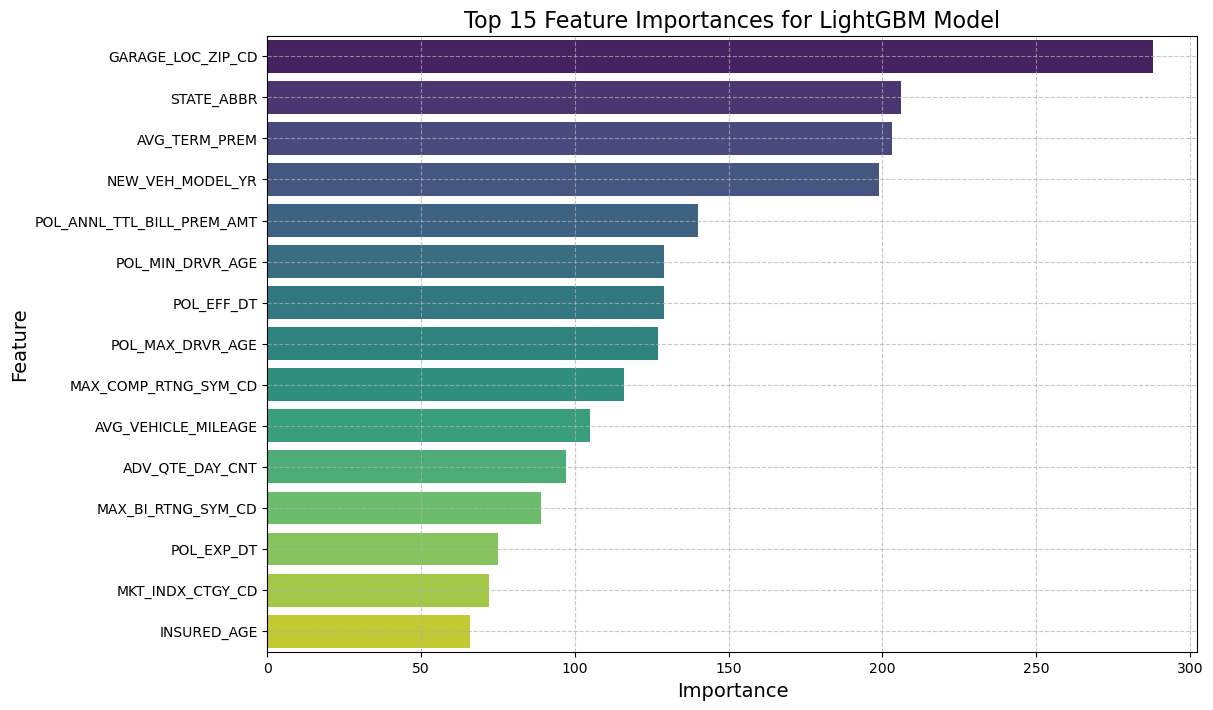

In [13]:
# Get feature importances from the LightGBM model
feature_importances = lgb_model.feature_importances_
features = X_train.columns

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 15 features
top_15_features = importance_df.head(15)

# Print the top 15 features
print("Top 15 Features:")
print(top_15_features)

# Plot the top 15 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_15_features, palette='viridis')

# Add title and labels
plt.title('Top 15 Feature Importances for LightGBM Model', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

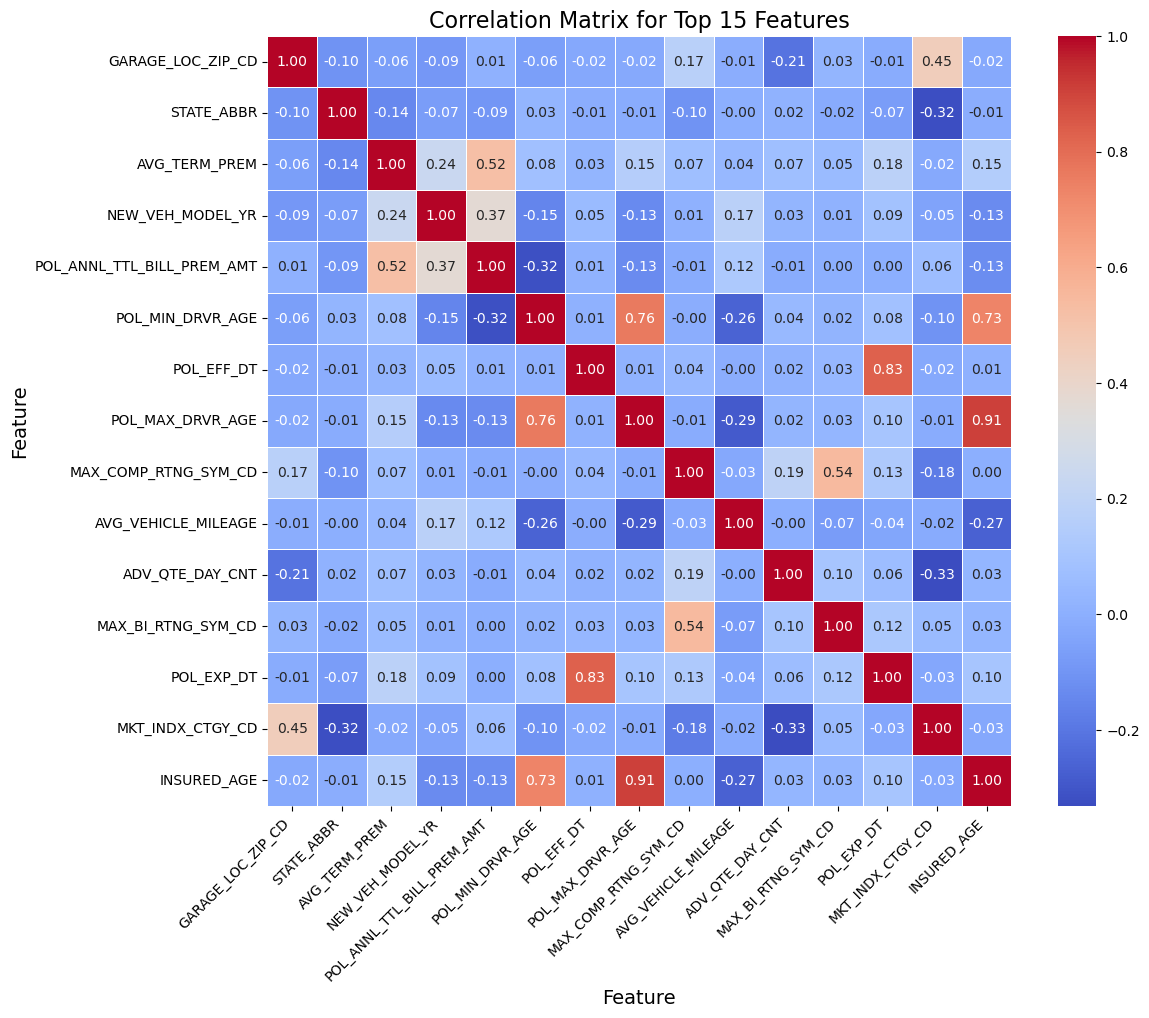

In [14]:
# Calculate the correlation matrix for the top 15 features
X_train_top15 = X_train[top_15_features['Feature']]
corr_matrix = X_train_top15.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix for Top 15 Features', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()


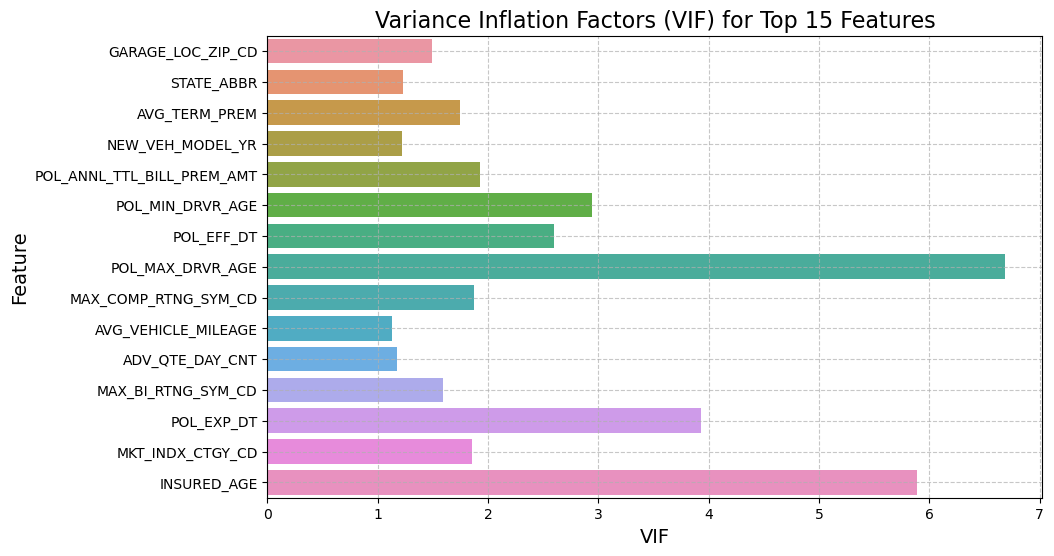

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Select the top 15 features
top_15_features_list = top_15_features['Feature'].tolist()
X_train_top15 = X_train[top_15_features_list]

# Calculate VIF for the top 15 features
vif_df = calculate_vif(X_train_top15)

# Plot the VIFs
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='feature', data=vif_df)
plt.title('Variance Inflation Factors (VIF) for Top 15 Features', fontsize=16)
plt.xlabel('VIF', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Creating new features to enhance model performance, making features only from the top 15

In [18]:
current_year = 2024
# Policy and Premium-Related Features
train_df['PREMIUM_CHANGE'] = train_df['RENEWAL_PREMIUM_CHANGE_TWO_TERM'].abs()
test_df['PREMIUM_CHANGE'] = test_df['RENEWAL_PREMIUM_CHANGE_TWO_TERM'].abs()

# Difference between POL_MAX_DRVR_AGE and POL_MIN_DRVR_AGE
train_df['DRVR_AGE_DIFF'] = train_df['POL_MAX_DRVR_AGE'] - train_df['POL_MIN_DRVR_AGE']
test_df['DRVR_AGE_DIFF'] = test_df['POL_MAX_DRVR_AGE'] - test_df['POL_MIN_DRVR_AGE']

# Difference between POL_ANNL_TTL_BILL_PREM_AMT and AVG_TERM_PREM
train_df['BILL_PREM_DIFF'] = train_df['POL_ANNL_TTL_BILL_PREM_AMT'] - train_df['AVG_TERM_PREM']
test_df['BILL_PREM_DIFF'] = test_df['POL_ANNL_TTL_BILL_PREM_AMT'] - test_df['AVG_TERM_PREM']

# Average of MAX_COMP_RTNG_SYM_CD and MAX_BI_RTNG_SYM_CD
train_df['AVG_COMP_BI_RTNG_SYM'] = (train_df['MAX_COMP_RTNG_SYM_CD'] + train_df['MAX_BI_RTNG_SYM_CD']) / 2
test_df['AVG_COMP_BI_RTNG_SYM'] = (test_df['MAX_COMP_RTNG_SYM_CD'] + test_df['MAX_BI_RTNG_SYM_CD']) / 2

# Vehicle-Related Features
train_df['VEHICLE_AGE'] = current_year - train_df['NEW_VEH_MODEL_YR']
test_df['VEHICLE_AGE'] = current_year - test_df['NEW_VEH_MODEL_YR']



In [19]:
# Define the combined feature set with domain-specific features and the new features
combined_features = [
    'GARAGE_LOC_ZIP_CD', 'STATE_ABBR', 'AVG_VEHICLE_MILEAGE', 
    'ADV_QTE_DAY_CNT', 'YEARS_WITH_HIG',
    'PREMIUM_CHANGE', 'VEHICLE_AGE',
    'DRVR_AGE_DIFF', 'BILL_PREM_DIFF', 'AVG_COMP_BI_RTNG_SYM'
]

# Prepare the datasets
X_train_combined = train_df[combined_features]
X_test_combined = test_df[combined_features]

y_train = train_df['STATUS_BINARY']
y_test = test_df['STATUS_BINARY']


In [20]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train the LightGBM model
model_lgb = lgb.LGBMClassifier(random_state=42)

cv_scores = cross_val_score(model_lgb, X_train_combined, y_train, cv=5, scoring = 'precision')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
model_lgb.fit(X_train_combined, y_train)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
        print(f"ROC AUC Score (OvR): {roc_auc_score(y_test, y_pred_proba)}")

# Evaluate the model
print("Model LightGBM with New Features: STATUS_BINARY Prediction")
evaluate_model(model_lgb, X_test_combined, y_test)


[LightGBM] [Info] Number of positive: 32671, number of negative: 179298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1494
[LightGBM] [Info] Number of data points in the train set: 211969, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.154131 -> initscore=-1.702561
[LightGBM] [Info] Start training from score -1.702561
[LightGBM] [Info] Number of positive: 32671, number of negative: 179298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1490
[LightGBM] [Info] Number of data points in the train set: 211969, number of used features: 10
[LightGBM] [In

C:\Users\peter\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


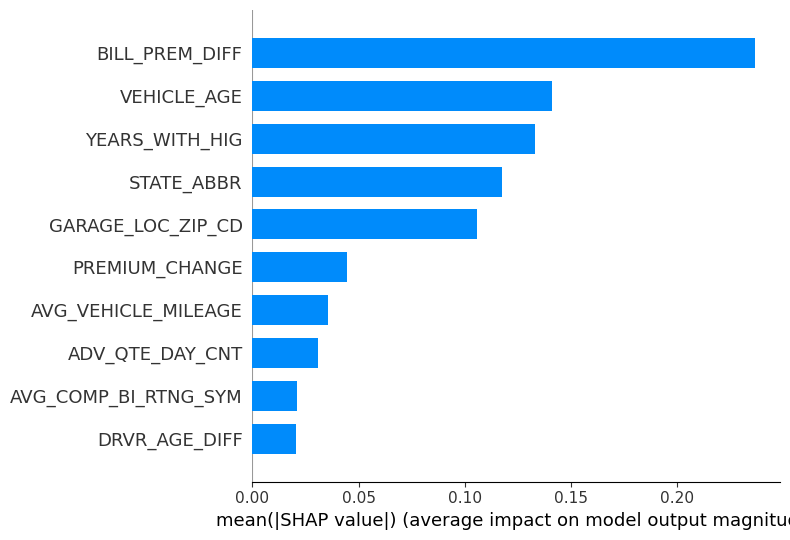

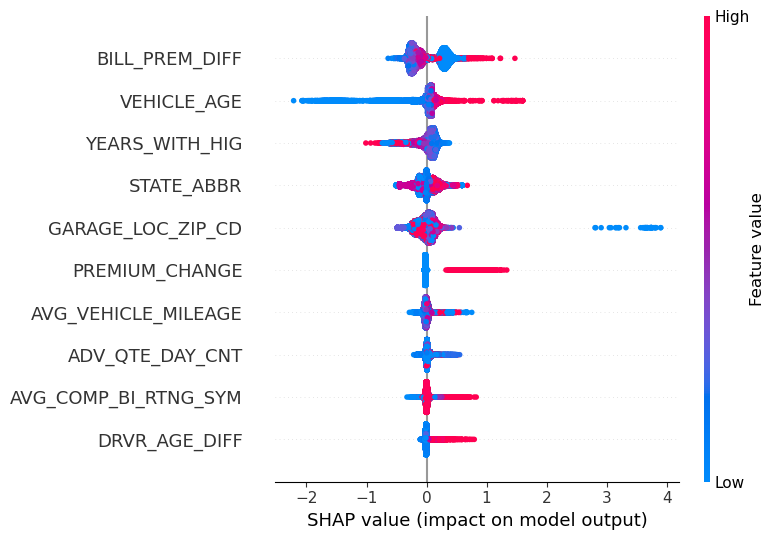

In [21]:
import shap

# Initialize the explainer with the LightGBM model
explainer = shap.TreeExplainer(model_lgb)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_combined)

# Summary plot
shap.summary_plot(shap_values, X_test_combined, plot_type="bar")

# Detailed summary plot
shap.summary_plot(shap_values, X_test_combined)


Fitting XGBoost and Random Forest using the features made and the remaining.
#NOTE : we did not include all features from the top 15 because a few of them do no have good variance and were not contributing to model performance.

In [23]:
# Fit Random Forest model
rf_model = RandomForestClassifier(random_state=42)

rfcv_scores = cross_val_score(rf_model, X_train_combined, y_train, cv=5, scoring = 'precision')

print("Cross-validation scores:", rfcv_scores)
print("Mean CV accuracy:", rfcv_scores.mean())

rf_model.fit(X_train_combined, y_train)

# Predict on test set with Random Forest
y_test_pred_rf = rf_model.predict(X_test_combined)

# Fit XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_combined, y_train)

# Predict on test set with XGBoost
y_test_pred_xgb = xgb_model.predict(X_test_combined)


Cross-validation scores: [0.31432114 0.29380531 0.30406977 0.31892879 0.32244656]
Mean CV accuracy: 0.3107143125056762


C:\Users\peter\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:57:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [24]:
from sklearn.metrics import precision_score

# Evaluate LightGBM model
y_test_pred_lgb = model_lgb.predict(X_test_combined)

# Function to get class-wise precision
def get_class_precision(y_test, y_pred):
    return precision_score(y_test, y_pred, average=None)

# Get class-wise precision for each model
precision_rf = get_class_precision(y_test, y_test_pred_rf)
precision_lgb = get_class_precision(y_test, y_test_pred_lgb)
precision_xgb = get_class_precision(y_test, y_test_pred_xgb)

# Prepare the data for plotting
precision_df = pd.DataFrame({
    'Random Forest': precision_rf,
    'LightGBM': precision_lgb,
    'XGBoost': precision_xgb
}, index=['Class 0', 'Class 1'])


Checking class wise model performance.

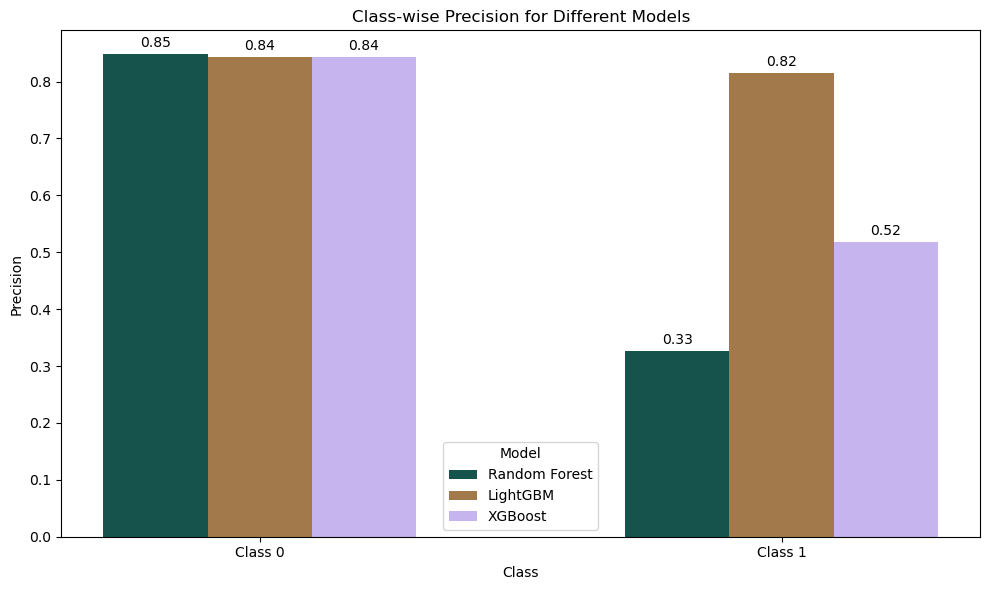

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score

# Function to get class-wise precision
def get_class_precision(y_test, y_pred):
    return precision_score(y_test, y_pred, average=None)

# Get class-wise precision for each model
precision_rf = get_class_precision(y_test, y_test_pred_rf)
precision_lgb = get_class_precision(y_test, y_test_pred_lgb)
precision_xgb = get_class_precision(y_test, y_test_pred_xgb)

# Prepare the data for plotting
precision_df = pd.DataFrame({
    'Random Forest': precision_rf,
    'LightGBM': precision_lgb,
    'XGBoost': precision_xgb
}, index=['Class 0', 'Class 1'])

# Plotting
labels = precision_df.index
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Set a custom color palette using Seaborn 'pastel' palette
colors = sns.color_palette('cubehelix', n_colors=3)

bars_rf = ax.bar(x - width, precision_df['Random Forest'], width, label='Random Forest', color=colors[0])
bars_lgb = ax.bar(x, precision_df['LightGBM'], width, label='LightGBM', color=colors[1])
bars_xgb = ax.bar(x + width, precision_df['XGBoost'], width, label='XGBoost', color=colors[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Class')
ax.set_ylabel('Precision')
ax.set_title('Class-wise Precision for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Position the legend at the bottom center of the graph
plt.legend(title='Model',loc='lower center', ncol=1 )

# Attach a text label above each bar in *rects*, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_rf)
autolabel(bars_lgb)
autolabel(bars_xgb)

# Ensure tight layout
fig.tight_layout()

# Show the plot
plt.show()


In [27]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Train the LightGBM model
model_lgb = lgb.LGBMClassifier(random_state=42)
model_lgb.fit(X_train_combined, y_train)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
        print(f"ROC AUC Score (OvR): {roc_auc_score(y_test, y_pred_proba)}")

# Evaluate the model on the test set
print("Model LightGBM with New Features: STATUS_BINARY Prediction")
evaluate_model(model_lgb, X_test_combined, y_test)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(model_lgb, X_train_combined, y_train, cv=cv, method='predict')
cv_precision = precision_score(y_train, y_pred_cv)

# Test set precision
y_pred_test = model_lgb.predict(X_test_combined)
test_precision = precision_score(y_test, y_pred_test)

[LightGBM] [Info] Number of positive: 40839, number of negative: 224123
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1438
[LightGBM] [Info] Number of data points in the train set: 264962, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.154132 -> initscore=-1.702558
[LightGBM] [Info] Start training from score -1.702558
Model LightGBM with New Features: STATUS_BINARY Prediction
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     39339
           1       0.82      0.01      0.02      7420

    accuracy                           0.84     46759
   macro avg       0.83      0.50      0.47     46759
weighted avg       0.84      0.84      0.77     46759

[[39322    17]
 [ 7345    75]]
ROC AUC Score (OvR): 0.

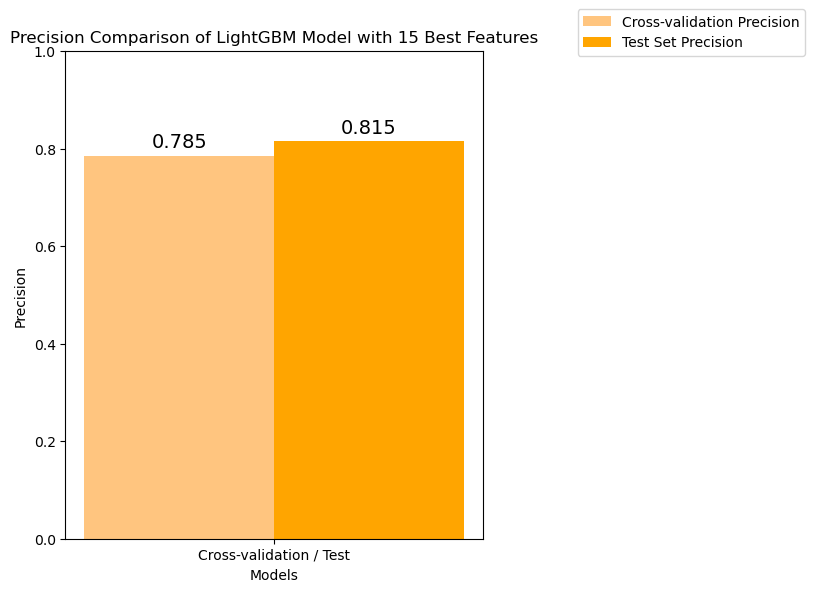

In [28]:
# Plotting
labels = ['Cross-validation / Test']
cv_precisions = [cv_precision]
test_precisions = [test_precision]

x = np.arange(len(labels))  # the label locations
width = 0.1  # reduce the width of the bars to make them thinner

fig, ax = plt.subplots(figsize=(10, 6))  # Increase the width of the figure
bars1 = ax.bar(x - width/2, cv_precisions, width, label='Cross-validation Precision', color='darkorange', alpha=0.5)
bars2 = ax.bar(x + width/2, test_precisions, width, label='Test Set Precision', color='orange', alpha=1.0)

# Add precision labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)

autolabel(bars1)
autolabel(bars2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Precision')
ax.set_title('Precision Comparison of LightGBM Model with 15 Best Features')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Position the legend at the top center
ax.legend(loc='upper center', bbox_to_anchor=(1.5, 1.1), ncol=1)

# Set y-axis range from 0 to 1
ax.set_ylim(0, 1)

# Ensure tight layout
fig.tight_layout()

# Show the plot
plt.show()



We tried different techniques like PCA, t-SNE, RFE etc but none of them were working well, so not including those in this file.

2nd Model starts from here.

In [31]:
from sklearn.model_selection import cross_val_score

# Filter the data for actual cancellations (drop class 0)
train_df_cancellations = train_df[train_df['STATUS'] != 0]
test_df_cancellations = test_df[test_df['STATUS'] != 0]
# Use the STATUS column as the target for type of cancellation
train_df_cancellations['CANCELLATION_TYPE'] = train_df_cancellations['STATUS']
test_df_cancellations['CANCELLATION_TYPE'] = test_df_cancellations['STATUS']



C:\Users\peter\AppData\Local\Temp\ipykernel_17472\2327333686.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_cancellations['CANCELLATION_TYPE'] = train_df_cancellations['STATUS']
C:\Users\peter\AppData\Local\Temp\ipykernel_17472\2327333686.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_cancellations['CANCELLATION_TYPE'] = test_df_cancellations['STATUS']


In [32]:
# Define the original feature set
original_features = X_train.columns.tolist()

# Prepare the datasets with original features
X_train_original_features = train_df_cancellations[original_features]
X_test_original_features = test_df_cancellations[original_features]

y_train_cancellations = train_df_cancellations['CANCELLATION_TYPE']
y_test_cancellations = test_df_cancellations['CANCELLATION_TYPE']


In [33]:
import lightgbm as lgb

# Train the LightGBM model with original features
model_lgb_original = lgb.LGBMClassifier(random_state=42)

cv_scores = cross_val_score(model_lgb_original, X_train_original_features, y_train_cancellations, cv=5, scoring = 'precision')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

model_lgb_original.fit(X_train_original_features, y_train_cancellations)

# Function to evaluate the model
def evaluate_model_cancellation_type(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Evaluate the LightGBM model for cancellation type prediction
print("Model LightGBM with Original Features: CANCELLATION_TYPE Prediction")
evaluate_model_cancellation_type(model_lgb_original, X_test_original_features, y_test_cancellations)


[LightGBM] [Info] Number of positive: 15379, number of negative: 17292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2815
[LightGBM] [Info] Number of data points in the train set: 32671, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470723 -> initscore=-0.117241
[LightGBM] [Info] Start training from score -0.117241
[LightGBM] [Info] Number of positive: 15378, number of negative: 17293
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2825
[LightGBM] [Info] Number of data points in the train set: 32671, number of used features: 50
[LightGBM] [Info] 

Checking feature importance based on lightgbm model.

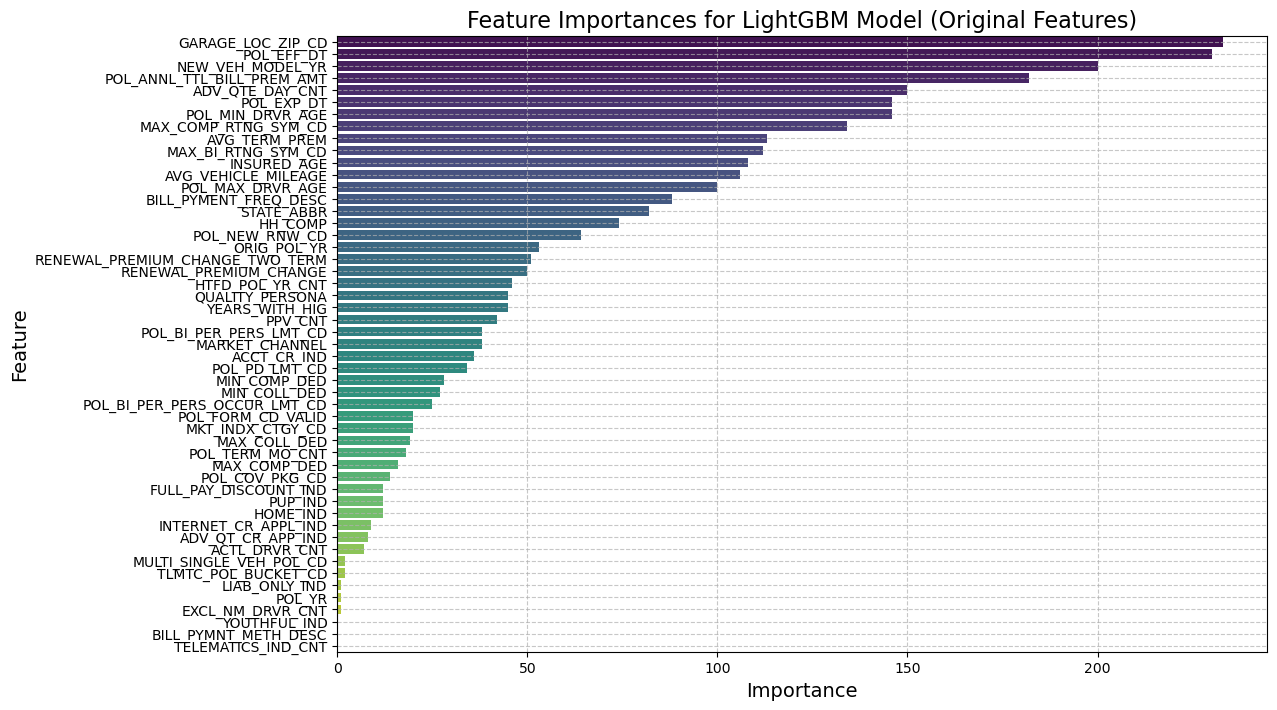

Top 15 Features for Cancellation Type Prediction with Original Features:
                       Feature  Importance
5            GARAGE_LOC_ZIP_CD         233
1                   POL_EFF_DT         230
18            NEW_VEH_MODEL_YR         200
48  POL_ANNL_TTL_BILL_PREM_AMT         182
32             ADV_QTE_DAY_CNT         150
2                   POL_EXP_DT         146
30            POL_MIN_DRVR_AGE         146
45        MAX_COMP_RTNG_SYM_CD         134
47               AVG_TERM_PREM         113
44          MAX_BI_RTNG_SYM_CD         112
40                 INSURED_AGE         108
41         AVG_VEHICLE_MILEAGE         106
29            POL_MAX_DRVR_AGE         100
33       BILL_PYMENT_FREQ_DESC          88
4                   STATE_ABBR          82


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the LightGBM model
feature_importances_original = model_lgb_original.feature_importances_
features = X_train_original_features.columns

# Create a DataFrame for the feature importances
importance_df_original = pd.DataFrame({'Feature': features, 'Importance': feature_importances_original})
importance_df_original = importance_df_original.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_original, palette='viridis')

# Add title and labels
plt.title('Feature Importances for LightGBM Model (Original Features)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Display the top 15 features
top_15_features_original = importance_df_original.head(15)
print("Top 15 Features for Cancellation Type Prediction with Original Features:")
print(top_15_features_original)


In [36]:
# Select the top 15 features
top_15_features = [
    'GARAGE_LOC_ZIP_CD', 'POL_EFF_DT', 'POL_ANNL_TTL_BILL_PREM_AMT', 'NEW_VEH_MODEL_YR',
    'POL_EXP_DT', 'POL_MIN_DRVR_AGE', 'ADV_QTE_DAY_CNT', 'MAX_BI_RTNG_SYM_CD',
    'MAX_COMP_RTNG_SYM_CD', 'AVG_TERM_PREM', 'INSURED_AGE', 'AVG_VEHICLE_MILEAGE',
    'POL_MAX_DRVR_AGE', 'BILL_PYMENT_FREQ_DESC', 'HH_COMP'
]

# Extract the top 15 features from the training data
X_train_top15 = train_df_cancellations[top_15_features]


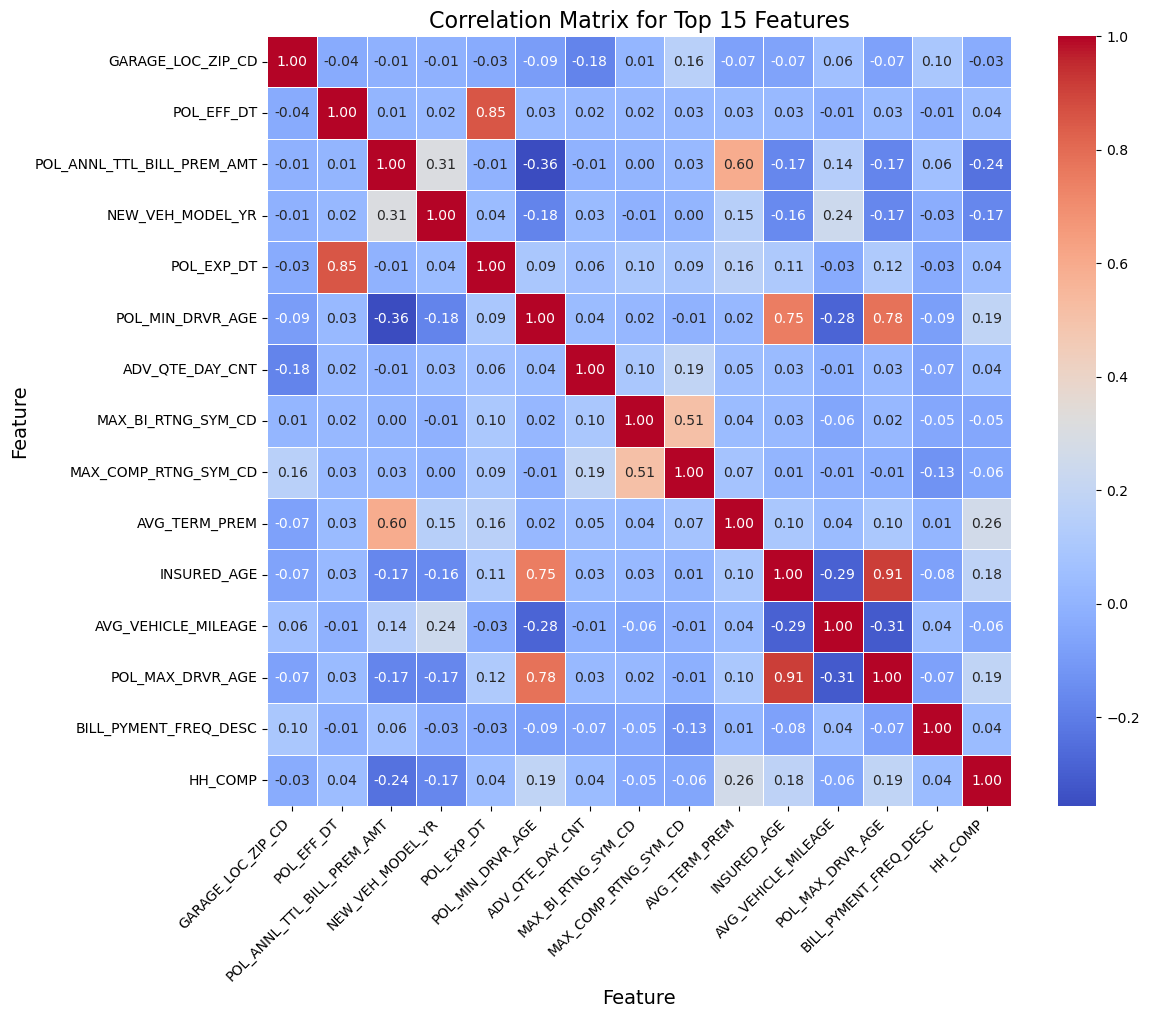

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = X_train_top15.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix for Top 15 Features', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()


In [38]:
# Define the reduced feature set
reduced_features = [
    'GARAGE_LOC_ZIP_CD', 'POL_EFF_DT', 'POL_ANNL_TTL_BILL_PREM_AMT', 'NEW_VEH_MODEL_YR',
    'POL_MIN_DRVR_AGE', 'ADV_QTE_DAY_CNT', 'MAX_BI_RTNG_SYM_CD', 'AVG_TERM_PREM',
    'INSURED_AGE', 'AVG_VEHICLE_MILEAGE', 'BILL_PYMENT_FREQ_DESC', 'HH_COMP'
]

# Prepare the datasets with reduced features
X_train_reduced = train_df_cancellations[reduced_features]
X_test_reduced = test_df_cancellations[reduced_features]


Tried Interaction terms below.

In [40]:
# Create interaction terms
train_df_cancellations['DRIVER_AGE_INTERACTION'] = train_df_cancellations['POL_MIN_DRVR_AGE'] * train_df_cancellations['INSURED_AGE']
test_df_cancellations['DRIVER_AGE_INTERACTION'] = test_df_cancellations['POL_MIN_DRVR_AGE'] * test_df_cancellations['INSURED_AGE']

# Add interaction terms to the reduced feature set
interaction_features = reduced_features + ['DRIVER_AGE_INTERACTION']

# Prepare the datasets with interaction features
X_train_interaction = train_df_cancellations[interaction_features]
X_test_interaction = test_df_cancellations[interaction_features]


C:\Users\peter\AppData\Local\Temp\ipykernel_17472\819715142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_cancellations['DRIVER_AGE_INTERACTION'] = train_df_cancellations['POL_MIN_DRVR_AGE'] * train_df_cancellations['INSURED_AGE']
C:\Users\peter\AppData\Local\Temp\ipykernel_17472\819715142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_cancellations['DRIVER_AGE_INTERACTION'] = test_df_cancellations['POL_MIN_DRVR_AGE'] * test_df_cancellations['INSURED_AGE']


In [41]:
# Train the LightGBM model with interaction features
model_lgb_interaction = lgb.LGBMClassifier(random_state=42)

cv_scores = cross_val_score(model_lgb_interaction, X_train_interaction, y_train_cancellations, cv=5, scoring = 'precision')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

model_lgb_interaction.fit(X_train_interaction, y_train_cancellations)

# Evaluate the model with interaction features
print("Model LightGBM with Interaction Features: CANCELLATION_TYPE Prediction")
evaluate_model_cancellation_type(model_lgb_interaction, X_test_interaction, y_test_cancellations)


[LightGBM] [Info] Number of positive: 15379, number of negative: 17292
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2020
[LightGBM] [Info] Number of data points in the train set: 32671, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470723 -> initscore=-0.117241
[LightGBM] [Info] Start training from score -0.117241
[LightGBM] [Info] Number of positive: 15378, number of negative: 17293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2024
[LightGBM] [Info] Number of data points in the train set: 32671, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470693 -> initscore=-0.117364
[LightGBM] [Info] Start training from score -0.117364
[LightGBM] [

In [42]:
# Define the combined feature set with the new features
combined_features = [
    'GARAGE_LOC_ZIP_CD', 'POL_EFF_DT', 'POL_ANNL_TTL_BILL_PREM_AMT', 'NEW_VEH_MODEL_YR',
    'POL_EXP_DT', 'POL_MIN_DRVR_AGE', 'ADV_QTE_DAY_CNT', 'MAX_BI_RTNG_SYM_CD',
    'MAX_COMP_RTNG_SYM_CD', 'AVG_TERM_PREM', 'INSURED_AGE', 'AVG_VEHICLE_MILEAGE',
    'POL_MAX_DRVR_AGE', 'BILL_PYMENT_FREQ_DESC', 'HH_COMP',
    'PREMIUM_CHANGE', 'DRVR_AGE_DIFF', 'BILL_PREM_DIFF', 'AVG_COMP_BI_RTNG_SYM', 'VEHICLE_AGE'
]

# Prepare the datasets with the combined features
X_train_combined = train_df_cancellations[combined_features]
X_test_combined = test_df_cancellations[combined_features]

y_train_cancellations = train_df_cancellations['CANCELLATION_TYPE']
y_test_cancellations = test_df_cancellations['CANCELLATION_TYPE']


In [43]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix

# Train the LightGBM model with combined features
model_lgb_combined = lgb.LGBMClassifier(random_state=42)

cv_scores = cross_val_score(model_lgb_combined, X_train_combined, y_train_cancellations, cv=5, scoring = 'precision')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

model_lgb_combined.fit(X_train_combined, y_train_cancellations)

# Function to evaluate the model
def evaluate_model_cancellation_type(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Evaluate the LightGBM model for cancellation type prediction
print("Model LightGBM with Combined Features: CANCELLATION_TYPE Prediction")
evaluate_model_cancellation_type(model_lgb_combined, X_test_combined, y_test_cancellations)


[LightGBM] [Info] Number of positive: 15379, number of negative: 17292
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2959
[LightGBM] [Info] Number of data points in the train set: 32671, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470723 -> initscore=-0.117241
[LightGBM] [Info] Start training from score -0.117241
[LightGBM] [Info] Number of positive: 15378, number of negative: 17293
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2972
[LightGBM] [Info] Number of data points in the train set: 32671, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470693 -> initscore=-0.117364
[L

FINAL MODEL WAS BASED ON THE 15 BEST FEATURES CHOSEN BY LIGHTGBM. NO OTHER FEATURE WERE ADDED

In [45]:
# Top 15 features based on the feature importance
top_15_features = [
    'GARAGE_LOC_ZIP_CD', 'POL_EFF_DT', 'POL_ANNL_TTL_BILL_PREM_AMT', 'NEW_VEH_MODEL_YR', 'POL_EXP_DT',
    'POL_MIN_DRVR_AGE', 'ADV_QTE_DAY_CNT', 'MAX_BI_RTNG_SYM_CD', 'MAX_COMP_RTNG_SYM_CD', 'AVG_TERM_PREM',
    'INSURED_AGE', 'AVG_VEHICLE_MILEAGE', 'POL_MAX_DRVR_AGE', 'BILL_PYMENT_FREQ_DESC', 'HH_COMP'
]

# Prepare the datasets with the top 15 features
X_train_top15 = train_df_cancellations[top_15_features]
X_test_top15 = test_df_cancellations[top_15_features]

y_train_cancellations = train_df_cancellations['CANCELLATION_TYPE']
y_test_cancellations = test_df_cancellations['CANCELLATION_TYPE']


In [46]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix

# Train the LightGBM model with top 15 features
model_lgb_top15 = lgb.LGBMClassifier(random_state=42)

cv_scores = cross_val_score(model_lgb_top15, X_train_top15, y_train_cancellations, cv=5, scoring = 'precision')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

model_lgb_top15.fit(X_train_top15, y_train_cancellations)

# Evaluate the LightGBM model
print("Model LightGBM with Top 15 Features: CANCELLATION_TYPE Prediction")
evaluate_model_cancellation_type(model_lgb_top15, X_test_top15, y_test_cancellations)


[LightGBM] [Info] Number of positive: 15379, number of negative: 17292
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2326
[LightGBM] [Info] Number of data points in the train set: 32671, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470723 -> initscore=-0.117241
[LightGBM] [Info] Start training from score -0.117241
[LightGBM] [Info] Number of positive: 15378, number of negative: 17293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2333
[LightGBM] [Info] Number of data points in the train set: 32671, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470693 -> initscore=-0.117364
[LightGBM] [Info] Start training from score -0.117364
[LightGBM] [

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model with top 15 features
model_rf_top15 = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(model_rf_top15, X_train_top15, y_train_cancellations, cv=5, scoring = 'precision')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

model_rf_top15.fit(X_train_top15, y_train_cancellations)

# Evaluate the Random Forest model
print("Model Random Forest with Top 15 Features: CANCELLATION_TYPE Prediction")
evaluate_model_cancellation_type(model_rf_top15, X_test_top15, y_test_cancellations)


Cross-validation scores: [0.59930841 0.60008591 0.60389189 0.60591027 0.60451977]
Mean CV accuracy: 0.6027432502406692
Model Random Forest with Top 15 Features: CANCELLATION_TYPE Prediction
              precision    recall  f1-score   support

           1       0.60      0.63      0.62      3951
           2       0.55      0.52      0.54      3469

    accuracy                           0.58      7420
   macro avg       0.58      0.58      0.58      7420
weighted avg       0.58      0.58      0.58      7420

[[2506 1445]
 [1668 1801]]


In [48]:
from catboost import CatBoostClassifier

# Train the CatBoost model with top 15 features
model_catboost_top15 = CatBoostClassifier(random_state=42, verbose=0)

cv_scores = cross_val_score(model_catboost_top15, X_train_top15, y_train_cancellations, cv=5, scoring = 'precision')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

model_catboost_top15.fit(X_train_top15, y_train_cancellations)

# Evaluate the CatBoost model
print("Model CatBoost with Top 15 Features: CANCELLATION_TYPE Prediction")
evaluate_model_cancellation_type(model_catboost_top15, X_test_top15, y_test_cancellations)


Cross-validation scores: [0.62983425 0.62873215 0.62770095 0.62807557 0.62628247]
Mean CV accuracy: 0.6281250795432312
Model CatBoost with Top 15 Features: CANCELLATION_TYPE Prediction
              precision    recall  f1-score   support

           1       0.63      0.66      0.65      3951
           2       0.59      0.56      0.57      3469

    accuracy                           0.61      7420
   macro avg       0.61      0.61      0.61      7420
weighted avg       0.61      0.61      0.61      7420

[[2610 1341]
 [1530 1939]]


In [49]:
# Get predictions for each model
y_pred_lgb = model_lgb_top15.predict(X_test_top15)
y_pred_rf = model_rf_top15.predict(X_test_top15)
y_pred_catboost = model_catboost_top15.predict(X_test_top15)


Fitting models based on feature importance

<Figure size 1000x600 with 0 Axes>

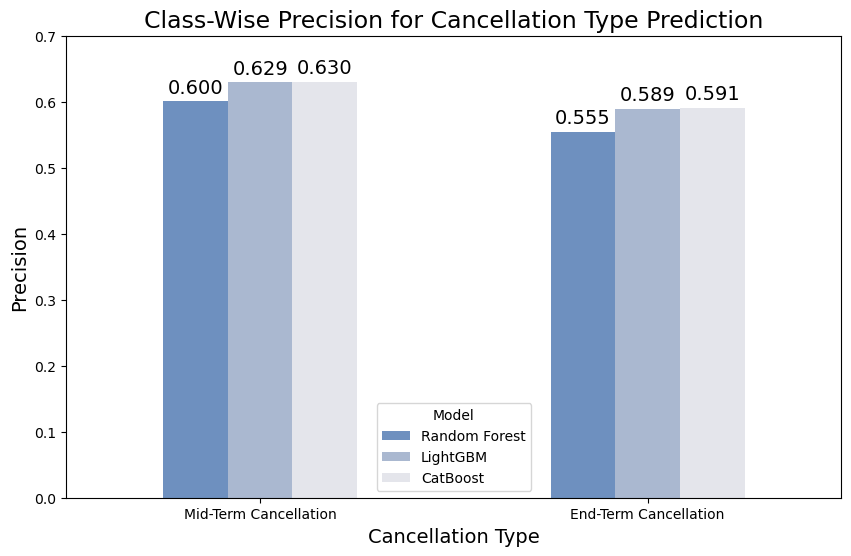

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

# Function to get class-wise precision
def get_class_precision(y_test, y_pred):
    return precision_score(y_test, y_pred, average=None)

# Get class-wise precision for each model
precision_rf = get_class_precision(y_test_cancellations, y_pred_rf)
precision_lgb = get_class_precision(y_test_cancellations, y_pred_lgb)
precision_catboost = get_class_precision(y_test_cancellations, y_pred_catboost)

# Prepare the data for plotting
precision_df = pd.DataFrame({
    'Random Forest': precision_rf,
    'LightGBM': precision_lgb,
    'CatBoost': precision_catboost
}, index=['Mid-Term Cancellation', 'End-Term Cancellation'])

# Set a custom color palette using Seaborn
colors = sns.color_palette('vlag')

# Plot the precision for each class
plt.figure(figsize=(10, 6))
ax = precision_df.plot(kind='bar', figsize=(10, 6), color=colors)

# Annotate bars with precision values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)

# Add title and labels
plt.title('Class-Wise Precision for Cancellation Type Prediction', fontsize=17)
plt.xlabel('Cancellation Type', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Model', loc='lower center', ncol=1)

# Show the plot

plt.ylim(0, 0.7)  # Ensure y-axis starts from 0 to 1

plt.show()


Recursive feature selection

In [53]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Initialize RFE with the number of features to select
n_features_to_select = 15
rfe = RFE(estimator=rf, n_features_to_select=n_features_to_select)

# Fit RFE
rfe.fit(X_train_original_features, y_train_cancellations)

# Get the selected features
selected_features = X_train_original_features.columns[rfe.support_]
print("Selected Features by RFE:")
print(selected_features)


Selected Features by RFE:
Index(['POL_EFF_DT', 'POL_EXP_DT', 'GARAGE_LOC_ZIP_CD', 'YEARS_WITH_HIG',
       'NEW_VEH_MODEL_YR', 'POL_MAX_DRVR_AGE', 'POL_MIN_DRVR_AGE',
       'ADV_QTE_DAY_CNT', 'INSURED_AGE', 'AVG_VEHICLE_MILEAGE',
       'HTFD_POL_YR_CNT', 'MAX_BI_RTNG_SYM_CD', 'MAX_COMP_RTNG_SYM_CD',
       'AVG_TERM_PREM', 'POL_ANNL_TTL_BILL_PREM_AMT'],
      dtype='object')


In [54]:
# Prepare the datasets with selected features
X_train_selected = X_train_original_features[selected_features]
X_test_selected = X_test_original_features[selected_features]


In [55]:
# Train and evaluate RandomForest model
rf_model_rfe = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(rf_model_rfe, X_train_selected, y_train_cancellations, cv=5, scoring = 'precision')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

rf_model_rfe.fit(X_train_selected, y_train_cancellations)
y_test_pred_rf_rfe = rf_model_rfe.predict(X_test_selected)
print("RandomForest with RFE Features: CANCELLATION_TYPE Prediction")
print(classification_report(y_test_cancellations, y_test_pred_rf_rfe))

# Train and evaluate LightGBM model
model_lgb_rfe = lgb.LGBMClassifier(random_state=42)

cv_scores = cross_val_score(model_lgb_rfe, X_train_selected, y_train_cancellations, cv=5, scoring = 'precision')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

model_lgb_rfe.fit(X_train_selected, y_train_cancellations)
y_test_pred_lgb_rfe = model_lgb_rfe.predict(X_test_selected)
print("LightGBM with RFE Features: CANCELLATION_TYPE Prediction")
print(classification_report(y_test_cancellations, y_test_pred_lgb_rfe))

# Train and evaluate CatBoost model
model_catboost_rfe = CatBoostClassifier(random_state=42, verbose=0)

cv_scores = cross_val_score(model_catboost_rfe, X_train_selected, y_train_cancellations, cv=5, scoring = 'precision')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

model_catboost_rfe.fit(X_train_selected, y_train_cancellations)
y_test_pred_catboost_rfe = model_catboost_rfe.predict(X_test_selected)
print("CatBoost with RFE Features: CANCELLATION_TYPE Prediction")
print(classification_report(y_test_cancellations, y_test_pred_catboost_rfe))


Cross-validation scores: [0.5947292  0.58616455 0.57900102 0.58118609 0.58278689]
Mean CV accuracy: 0.5847735494785689
RandomForest with RFE Features: CANCELLATION_TYPE Prediction
              precision    recall  f1-score   support

           1       0.58      0.66      0.62      3951
           2       0.54      0.46      0.49      3469

    accuracy                           0.56      7420
   macro avg       0.56      0.56      0.55      7420
weighted avg       0.56      0.56      0.56      7420

[LightGBM] [Info] Number of positive: 15379, number of negative: 17292
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2422
[LightGBM] [Info] Number of data points in the train set: 32671, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470723 -> initscore=-0.117241
[LightGBM] [Info] Start training from score -0.117241

<Figure size 1000x600 with 0 Axes>

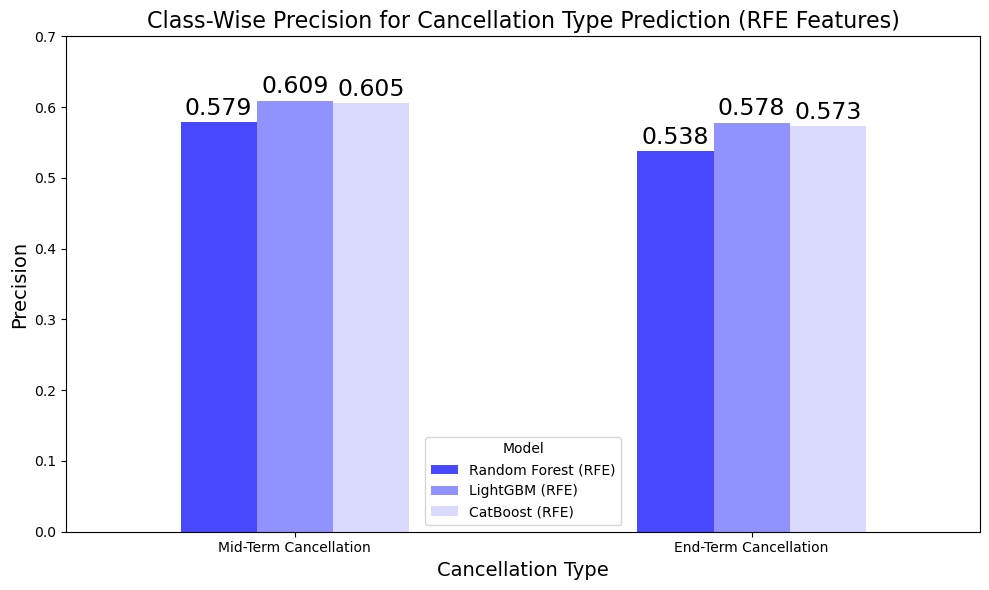

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score

# Function to get class-wise precision (replace with your actual function)
def get_class_precision(y_test, y_pred):
    return precision_score(y_test, y_pred, average=None)

precision_rf_rfe = get_class_precision(y_test_cancellations, y_test_pred_rf_rfe)
precision_lgb_rfe = get_class_precision(y_test_cancellations, y_test_pred_lgb_rfe)
precision_catboost_rfe = get_class_precision(y_test_cancellations, y_test_pred_catboost_rfe)

# Assuming precision_rf_rfe, precision_lgb_rfe, and precision_catboost_rfe are defined
# Prepare the data for plotting
precision_rfe_df = pd.DataFrame({
    'Random Forest (RFE)': precision_rf_rfe,
    'LightGBM (RFE)': precision_lgb_rfe,
    'CatBoost (RFE)': precision_catboost_rfe
}, index=['Mid-Term Cancellation', 'End-Term Cancellation'])

# Set a custom color palette using Seaborn 'bwr' palette
colors = sns.color_palette('bwr')

# Plot the precision for each class
plt.figure(figsize=(10, 6))
ax = precision_rfe_df.plot(kind='bar', figsize=(10, 6), color=colors)

# Annotate bars with precision values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=17)

# Add title and labels
plt.title('Class-Wise Precision for Cancellation Type Prediction (RFE Features)', fontsize=16)
plt.xlabel('Cancellation Type', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.xticks(rotation=0)

# Position the legend at the bottom center of the graph
plt.legend(title='Model', loc='lower center', ncol=1)

# Remove the grid
plt.grid(False)

# Set y-axis range from 0 to 0.8
plt.ylim(0, 0.7)

# Ensure tight layout
plt.tight_layout()

# Show the plot
plt.show()


Principal component analysis

In [61]:
from sklearn.decomposition import PCA

# Standardize the data before applying PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top15)
X_test_scaled = scaler.transform(X_test_top15)

# Apply PCA
pca = PCA(n_components=0.95, random_state=42)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check the number of components
print(f'Number of PCA components: {X_train_pca.shape[1]}')


Number of PCA components: 11


In [63]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train LightGBM model
model_lgb_pca = lgb.LGBMClassifier(random_state=42)

cv_scores = cross_val_score(model_lgb_pca, X_train_pca, y_train_cancellations, cv=5, scoring = 'precision')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

model_lgb_pca.fit(X_train_pca, y_train_cancellations)

# Train Random Forest model
model_rf_pca = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(model_rf_pca, X_train_pca, y_train_cancellations, cv=5, scoring = 'precision')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

model_rf_pca.fit(X_train_pca, y_train_cancellations)

# Train CatBoost model
model_catboost_pca = CatBoostClassifier(random_state=42, verbose=0)


cv_scores = cross_val_score(model_catboost_pca, X_train_pca, y_train_cancellations, cv=5, scoring = 'precision')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

model_catboost_pca.fit(X_train_pca, y_train_cancellations)

# Function to evaluate the model
def evaluate_model_pca(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"{name} Model with PCA: CANCELLATION_TYPE Prediction")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Evaluate the models
evaluate_model_pca("LightGBM", model_lgb_pca, X_test_pca, y_test_cancellations)
evaluate_model_pca("Random Forest", model_rf_pca, X_test_pca, y_test_cancellations)
evaluate_model_pca("CatBoost", model_catboost_pca, X_test_pca, y_test_cancellations)


[LightGBM] [Info] Number of positive: 15379, number of negative: 17292
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 32671, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470723 -> initscore=-0.117241
[LightGBM] [Info] Start training from score -0.117241
[LightGBM] [Info] Number of positive: 15378, number of negative: 17293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 32671, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470693 -> initscore=-0.117364
[LightGBM] [Info] Start training from score -0.117364
[LightGBM] [

<Figure size 1000x600 with 0 Axes>

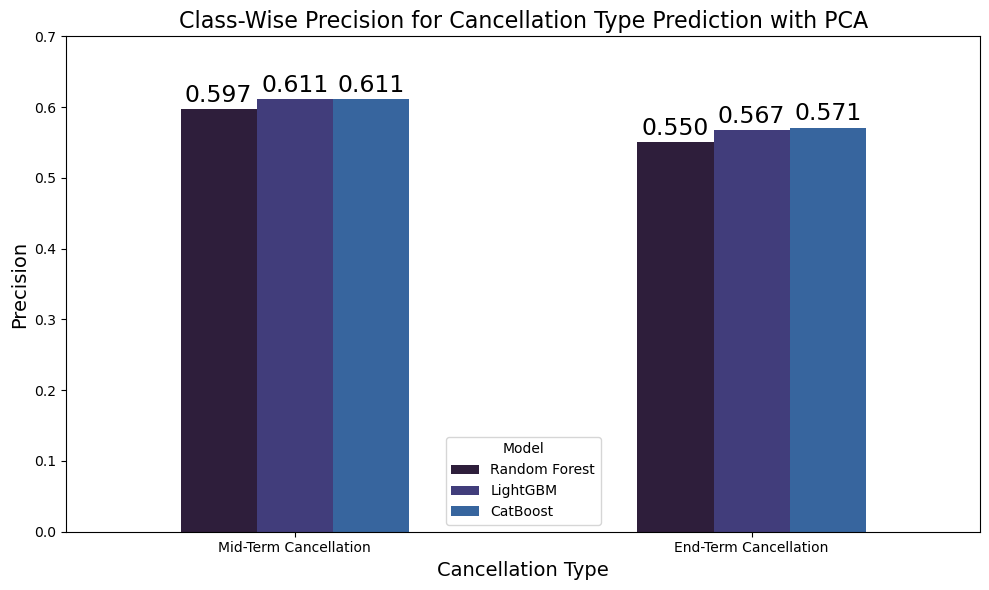

In [64]:
# Get predictions for each model
y_pred_lgb_pca = model_lgb_pca.predict(X_test_pca)
y_pred_rf_pca = model_rf_pca.predict(X_test_pca)
y_pred_catboost_pca = model_catboost_pca.predict(X_test_pca)

# Get class-wise precision for each model
precision_rf_pca = get_class_precision(y_test_cancellations, y_pred_rf_pca)
precision_lgb_pca = get_class_precision(y_test_cancellations, y_pred_lgb_pca)
precision_catboost_pca = get_class_precision(y_test_cancellations, y_pred_catboost_pca)

# Prepare the data for plotting
precision_df_pca = pd.DataFrame({
    'Random Forest': precision_rf_pca,
    'LightGBM': precision_lgb_pca,
    'CatBoost': precision_catboost_pca
}, index=['Mid-Term Cancellation', 'End-Term Cancellation'])

# Plotting setup
plt.figure(figsize=(10, 6))
colors = sns.color_palette('mako')

# Plot the precision for each class
ax = precision_df_pca.plot(kind='bar', figsize=(10, 6), color=colors)

# Annotate bars with precision values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=17)

# Add title and labels
plt.title('Class-Wise Precision for Cancellation Type Prediction with PCA', fontsize=16)
plt.xlabel('Cancellation Type', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Model',loc='lower center', ncol=1 )

# Show the plot

plt.ylim(0, 0.7)  # Ensure y-axis starts from 0 to 1
plt.tight_layout()
plt.show()